<a href="https://colab.research.google.com/github/Imshubhham/Imshubham/blob/main/Traffic_sign_classification_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content/drive/MyDrive/Kaggle'

In [3]:
%cd '/content/drive/MyDrive/Kaggle'

/content/drive/MyDrive/Kaggle


In [ ]:
!kaggle datasets download -d meowmeowmeowmeowmeow/gtsrb-german-traffic-sign

 98% 599M/612M [00:05<00:00, 82.4MB/s]
100% 612M/612M [00:05<00:00, 120MB/s] 


In [ ]:
!unzip \*.zip  && rm *.zip

Archive:  gtsrb-german-traffic-sign.zip
replace Meta.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [4]:
# Importing libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread
import seaborn as sns
import random
from PIL import Image
from sklearn.model_selection import  train_test_split
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPool2D

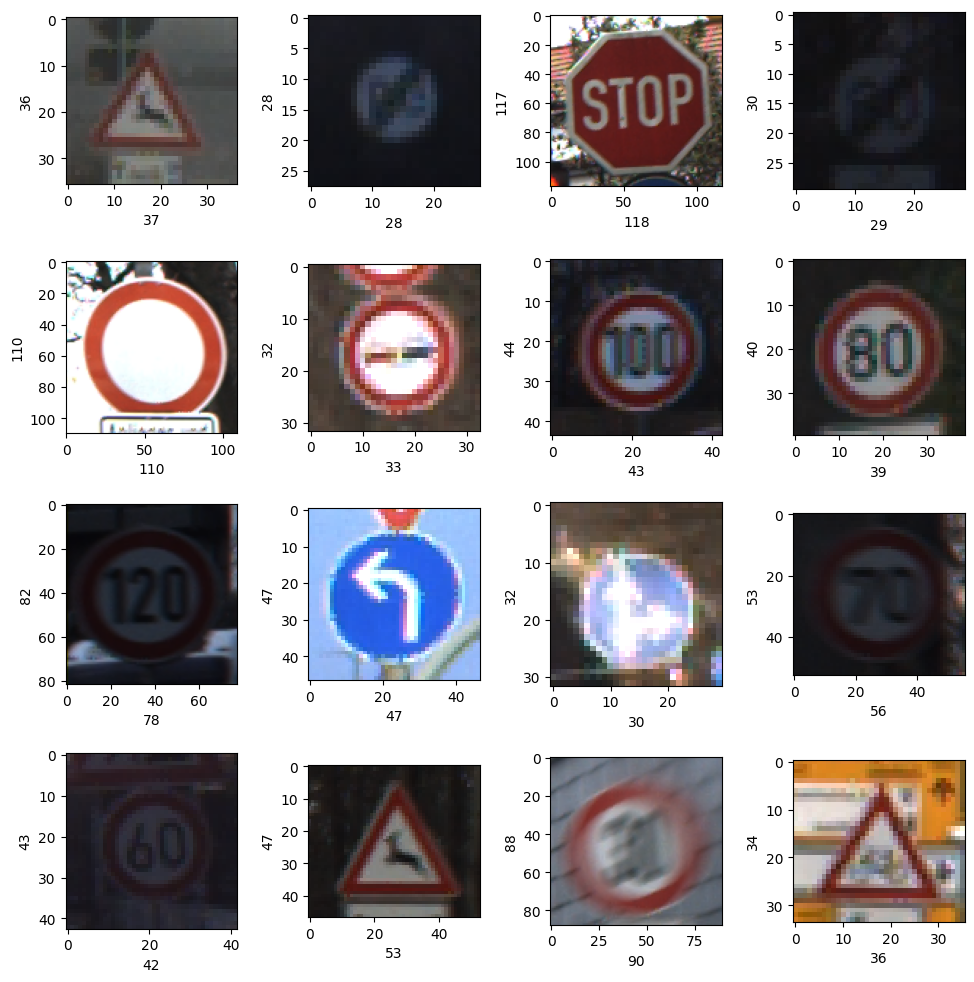

In [5]:
# Plotting 12 images to check dataset
plt.figure(figsize=(10,10))
path = "/content/drive/MyDrive/Kaggle/Test"
for i in range(1,17):
    plt.subplot(4,4,i)
    plt.tight_layout()
    rand_img = imread(path +'/'+ random.choice(sorted(os.listdir(path))))
    plt.imshow(rand_img)
    plt.xlabel(rand_img.shape[1], fontsize = 10)#width of image
    plt.ylabel(rand_img.shape[0], fontsize = 10)#height of image

Visualizing some images of traffic sign from the test dataset. we can see here that the dimension of images are uneven.

In [6]:
# As size of images are different we have to make them equal so we will take mean of dimanesions
dim1 = []
dim2 = []

for i in range(0,43):
    labels = '/content/drive/MyDrive/Kaggle/Train' + '/{0}'.format(i)
    image_path = os.listdir(labels)
    for x in image_path:
        img = imread(labels + '/' + x)
        dim1.append(img.shape[0])
        dim2.append(img.shape[1])

For further processing we will require the images of same dimension. So, we will start storing the dimension of all the images from training dataset from all 43 classes.

In [7]:
#Printing mean dimension of images
print("Dimension 1 Mean : ",np.mean(dim1), " Dimension 2 Mean : ",np.mean(dim2))

Dimension 1 Mean :  51.67783859918691  Dimension 2 Mean :  52.423829187874134



Now we will reshape the images into (50,50) and also store their label ids.

In [8]:
# Now we will reshape the images to (50,50)
images = []
label_id = []

for i in range(43):
    labels = '/content/drive/MyDrive/Kaggle/Train' + '/{0}'.format(i)
    image_path = os.listdir(labels)
    for x in image_path:
        img = Image.open(labels + '/' + x)
        img = img.resize((50,50))
        img = np.array(img)
        images.append(img)
        label_id.append(i)

In [9]:
#Converting images into numpy array
images = np.array(images)
#The pixel value of each image ranges between 0 and 255
#Dividing each image by 255 will scale the values between 0 and 1. This is also known as normalization.
images = images/255

In [10]:
label_id = np.array(label_id)
label_id.shape

(31239,)

In [11]:
images.shape

(31239, 50, 50, 3)

In [12]:
# Visualize the number of classes count
label_counts = pd.DataFrame(label_id).value_counts()
label_counts.head()

2     2250
1     2220
13    2160
12    2100
38    2070
dtype: int64

In [13]:
#Splitting the data
x_train, x_val, y_train, y_val = train_test_split(images, label_id , test_size = 0.2, random_state = 42)

In [14]:
#keras has a built-in function for one-hot encoding.
y_train_cat = to_categorical(y_train)
y_val_cat = to_categorical(y_val)

In [15]:
model = Sequential()

model.add(Conv2D(filters = 64, kernel_size = (3,3), input_shape = x_train.shape[1:], activation = 'relu', padding = 'same'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(43, activation = 'softmax'))

In [16]:
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 50, 50, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 25, 25, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 25, 25, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 23, 23, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 11, 11, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 11, 11, 64)        0

In [17]:
model.fit(x_train, y_train, epochs = 20, batch_size = 500, validation_data = (x_val, y_val), verbose = 2)

Epoch 1/20
50/50 - 17s - loss: 3.1222 - accuracy: 0.1847 - val_loss: 2.3498 - val_accuracy: 0.4826 - 17s/epoch - 337ms/step
Epoch 2/20
50/50 - 3s - loss: 1.9417 - accuracy: 0.4576 - val_loss: 1.3894 - val_accuracy: 0.7069 - 3s/epoch - 67ms/step
Epoch 3/20
50/50 - 3s - loss: 1.3114 - accuracy: 0.6107 - val_loss: 0.8233 - val_accuracy: 0.8371 - 3s/epoch - 69ms/step
Epoch 4/20
50/50 - 3s - loss: 0.9621 - accuracy: 0.7065 - val_loss: 0.5355 - val_accuracy: 0.9072 - 3s/epoch - 70ms/step
Epoch 5/20
50/50 - 3s - loss: 0.7490 - accuracy: 0.7671 - val_loss: 0.3711 - val_accuracy: 0.9280 - 3s/epoch - 67ms/step
Epoch 6/20
50/50 - 3s - loss: 0.6236 - accuracy: 0.8049 - val_loss: 0.2561 - val_accuracy: 0.9480 - 3s/epoch - 67ms/step
Epoch 7/20
50/50 - 4s - loss: 0.5220 - accuracy: 0.8354 - val_loss: 0.2132 - val_accuracy: 0.9657 - 4s/epoch - 70ms/step
Epoch 8/20
50/50 - 3s - loss: 0.4584 - accuracy: 0.8555 - val_loss: 0.1574 - val_accuracy: 0.9704 - 3s/epoch - 68ms/step
Epoch 9/20
50/50 - 3s - loss:

<Axes: >

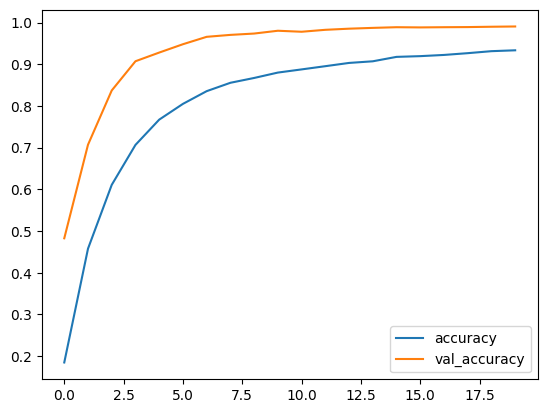

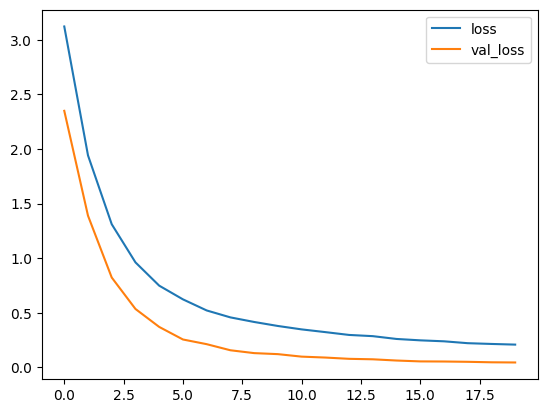

In [18]:
evaluation = pd.DataFrame(model.history.history)
evaluation[['accuracy', 'val_accuracy']].plot()
evaluation[['loss', 'val_loss']].plot()

In [19]:
test_path = '/content/drive/MyDrive/Kaggle/Test'
!rm /content/drive/MyDrive/Kaggle/Test/GT-final_test.csv

In [20]:
#defining a function that will scale images
from PIL import Image

def scaling(test_images, test_path):
    images = []

    image_path = test_images

    for x in image_path:
        img = Image.open(test_path + '/' + x)
        img = img.resize((50,50))
        img = np.array(img)
        images.append(img)

    #Converting images into numpy array
    images = np.array(images)
    #The pixel value of each image ranges between 0 and 255
    #Dividing each image by 255 will scale the values between 0 and 1. This is also known as normalization.
    images = images/255

    return images

In [21]:
test_images = scaling(sorted(os.listdir(test_path)),test_path)

In [22]:
test = pd.read_csv('/content/drive/MyDrive/Kaggle/Test.csv')
y_test = test['ClassId'].values
y_test

array([16,  1, 38, ...,  6,  7, 10])

In [23]:
y_pred = model.predict(test_images)
y_pred = np.argmax(y_pred, axis=1)
y_pred

395/395 [==============================] - 1s 3ms/step


array([16,  1, 38, ..., 38,  3, 10])

In [24]:
# Storing all lables
all_lables = ['Speed limit (20km/h)','Speed limit (30km/h)','Speed limit (50km/h)','Speed limit (60km/h)',
              'Speed limit (70km/h)','Speed limit (80km/h)','End of speed limit (80km/h)','Speed limit (100km/h)',
              'Speed limit (120km/h)','No passing','No passing for vechiles over 3.5 metric tons',
              'Right-of-way at the next intersection','Priority road','Yield','Stop','No vechiles',
              'Vechiles over 3.5 metric tons prohibited','No entry','General caution','Dangerous curve to the left',
              'Dangerous curve to the right','Double curve','Bumpy road','Slippery road','Road narrows on the right',
              'Road work','Traffic signals','Pedestrians','Children crossing','Bicycles crossing','Beware of ice/snow',
              'Wild animals crossing','End of all speed and passing limits','Turn right ahead','Turn left ahead',
              'Ahead only','Go straight or right','Go straight or left','Keep right','Keep left','Roundabout mandatory',
              'End of no passing','End of no passing by vechiles over 3.5 metric']

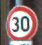

In [25]:
# Visualize test image
img = Image.open(test_path + '/00001.png')
img

In [26]:
# Original label
print("Original label : ",all_lables[y_test[1]])

Original label :  Speed limit (30km/h)


In [27]:
# Predicted label
print("Predicted label : ",all_lables[y_pred[1]])

Predicted label :  Speed limit (30km/h)


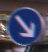

In [28]:
# Visualize test image
img = Image.open(test_path + '/00002.png')
img

In [29]:
# Original label
print("Original label : ",all_lables[y_test[2]])

Original label :  Keep right


In [30]:
# Predicted label
print("Predicted label : ",all_lables[y_pred[2]])

Predicted label :  Keep right


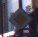

In [31]:
img = Image.open(test_path + '/00010.png')
img

In [32]:
print("Predicted label : ",all_lables[y_pred[10]])

Predicted label :  Priority road


In [33]:
print("Original label : ",all_lables[y_test[10]])

Original label :  Priority road
